<a href="https://colab.research.google.com/github/Seong-JiHyeon/Mini-Project/blob/master/%ED%83%9D%EB%B0%B0_%EC%84%9C%EC%9A%B8_%EC%A7%80%EC%97%AD%EC%9C%BC%EB%A1%9C_%EA%B5%AD%ED%95%9C%ED%95%98%EC%97%AC_KMeans_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/택배 주소 데이터

/content/gdrive/My Drive/택배 주소 데이터


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
df = pd.read_csv('south_korea.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.drop(labels= 'UNIT', axis=1, inplace=True)

In [ ]:
df.head()

,LON,LAT,NUMBER,STREET,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,126.970405,37.584415,94,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-760,31a06cfb755d9a77
1,126.970423,37.584513,96,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-4933,7f2722bcd38a0488
2,126.970394,37.584697,98,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-287,c5fcd0d5b8b2045c
3,126.969878,37.584916,99-3,자하문로,종로구,청운동,서울특별시,3032.0,1111010100-1336,8f31971e29cf77a8
4,126.969853,37.585080,99-4,자하문로,종로구,청운동,서울특별시,3032.0,1111010100-6021,67f93375ee07c754


In [ ]:
isseoul = df['REGION']=='서울특별시'
seoul = df[isseoul]
seoul.head()

,LON,LAT,NUMBER,STREET,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,126.970405,37.584415,94,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-760,31a06cfb755d9a77
1,126.970423,37.584513,96,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-4933,7f2722bcd38a0488
2,126.970394,37.584697,98,자하문로,종로구,청운동,서울특별시,3047.0,1111010100-287,c5fcd0d5b8b2045c
3,126.969878,37.584916,99-3,자하문로,종로구,청운동,서울특별시,3032.0,1111010100-1336,8f31971e29cf77a8
4,126.969853,37.585080,99-4,자하문로,종로구,청운동,서울특별시,3032.0,1111010100-6021,67f93375ee07c754


In [ ]:
seoul.dropna(axis=0,how='any',subset=['LON','LAT', 'POSTCODE'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
seoul=seoul.sample(frac=1).reset_index(drop=True)

In [ ]:
X=seoul.loc[:,['NUMBER','LON','LAT', 'POSTCODE']]

In [ ]:
K_clusters = range(1,10) #택배 기사 수 
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = seoul[['LAT']]
X_axis = seoul[['LON']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

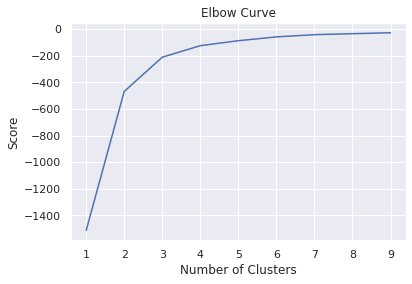

In [ ]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,NUMBER,LON,LAT,POSTCODE,cluster_label
0,16-3,127.081368,37.564136,4910.0,0
1,6-6,126.963096,37.548669,4311.0,2
2,7-4,126.903827,37.524947,7245.0,2
3,20,126.929556,37.479404,8775.0,2
4,54,126.841793,37.533939,7768.0,2
5,122-1,127.033524,37.608447,2737.0,1
6,43-5,127.092158,37.586023,2207.0,0
7,60,126.989010,37.536939,4351.0,1
8,10-13,127.128317,37.533960,5383.0,0
9,8-10,126.918883,37.593358,3467.0,2


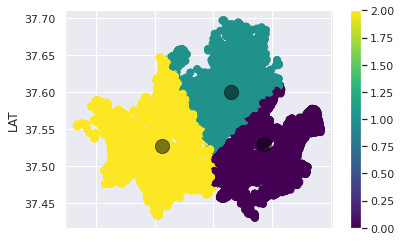

In [ ]:
X.plot.scatter(x = 'LON', y = 'LAT', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)



---
train test split

-> 택배 물량을 랜덤하게 하여 clustering 할 때 정확히 지역별로 나눠짐을 볼 수 있음

-> 하지만 변곡점 이상으로 분류할 경우 택배 물량이 균등하지 않음 (택배 기사의 수는 항상 변곡점보다 클 가능성이 매우 높음)

-> kmeans는 euclidean으로 거리 계산을 하기 때문에 넓은 범위의 위도와 경도에서는 맞지 않을 수 있지만, 대한민국의 특히 작은 지역을 계산할 때는 범위가 줄어들어 euclidean 거리 계산이 적합함

-> 택배를 운송해야 하는 범위가 집약적으로 나타남

-> 자율 주행 자동차를 사용한다면? / 사람이 운송한다면?



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(X)

573174

In [ ]:
573174*0.1

57317.4

In [ ]:
57317.4/250

229.2696

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.9, random_state=1004)

In [ ]:
kmeans = KMeans(n_clusters = 250)
kmeans.fit(X_train[X_train.columns[1:3]]) # Compute k-means clustering.
X_train['cluster_label'] = kmeans.fit_predict(X_train[X_train.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_train[X_train.columns[1:3]]) # Labels of each point
X_train.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NUMBER,LON,LAT,POSTCODE,cluster_label
313785,51-12,127.081103,37.568216,4905.0,110
124092,20,127.082135,37.592832,2139.0,61
5445,1,127.090823,37.581114,2213.0,206
254804,42,127.033162,37.669773,1314.0,26
559312,42,127.081045,37.605987,2046.0,62
383779,24-4,127.024344,37.626864,1125.0,219
339401,40-13,127.014173,37.642660,1033.0,94
473287,8-13,127.108580,37.601665,2063.0,109
137088,35,126.981927,37.497463,6994.0,137
65794,25-9,127.069306,37.657230,1697.0,54


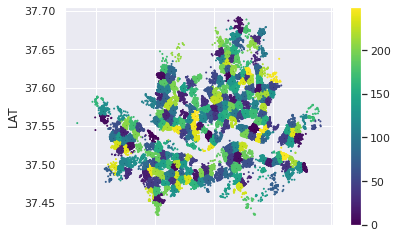

In [ ]:
X_train.plot.scatter(x = 'LON', y = 'LAT', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=0.01, alpha=0.5)

In [ ]:
iszero = X_train['cluster_label']==247
zero = X_train[iszero]
len(zero)

469

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


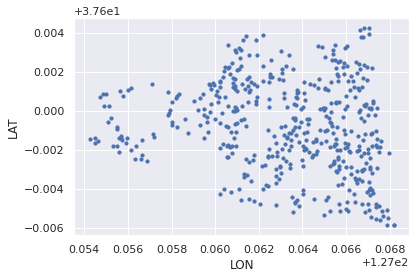

In [ ]:
X_train[iszero].plot.scatter(x = 'LON', y = 'LAT', s=10, cmap='viridis')

In [ ]:
X_train['cluster_label'].value_counts()

247    469
50     456
111    421
55     416
236    395
      ... 
232     36
204     32
128     27
240     24
150     22
Name: cluster_label, Length: 250, dtype: int64

In [ ]:
X_train.to_csv('deliver.csv', sep=',', na_rep='NaN')